In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccZ is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0791 - val_loss: 0.0692
Epoch 2/50
1s - loss: 0.0643 - val_loss: 0.0598
Epoch 3/50
0s - loss: 0.0553 - val_loss: 0.0507
Epoch 4/50
0s - loss: 0.0463 - val_loss: 0.0419
Epoch 5/50
1s - loss: 0.0380 - val_loss: 0.0342
Epoch 6/50
1s - loss: 0.0309 - val_loss: 0.0279
Epoch 7/50
1s - loss: 0.0254 - val_loss: 0.0232
Epoch 8/50
1s - loss: 0.0213 - val_loss: 0.0197
Epoch 9/50
1s - loss: 0.0184 - val_loss: 0.0172
Epoch 10/50
1s - loss: 0.0162 - val_loss: 0.0154
Epoch 11/50
1s - loss: 0.0147 - val_loss: 0.0141
Epoch 12/50
1s - loss: 0.0136 - val_loss: 0.0131
Epoch 13/50
1s - loss: 0.0128 - val_loss: 0.0124
Epoch 14/50
1s - loss: 0.0121 - val_loss: 0.0118
Epoch 15/50
1s - loss: 0.0116 - val_loss: 0.0114
Epoch 16/50
1s - loss: 0.0112 - val_loss

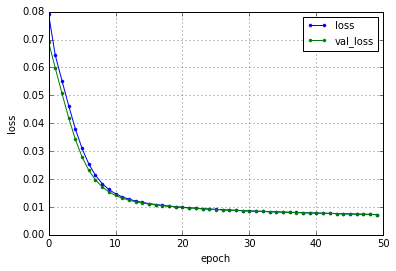

hiden node = 16
-edim=16-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0180 - val_loss: 0.0063
Epoch 2/50
1s - loss: 0.0047 - val_loss: 0.0036
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 5/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 6/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0014 - val_loss: 0.0015
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 19/50
1s - loss

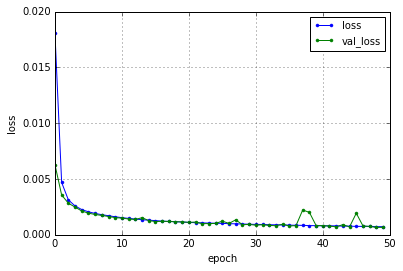

hiden node = 16
-edim=16-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0102 - val_loss: 0.0037
Epoch 2/50
1s - loss: 0.0029 - val_loss: 0.0023
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
1s - loss: 0.0010 - val_loss: 8.9744e-04
Epoch 7/50
1s - loss: 8.7124e-04 - val_loss: 7.7227e-04
Epoch 8/50
1s - loss: 7.8599e-04 - val_loss: 7.0655e-04
Epoch 9/50
1s - loss: 7.0742e-04 - val_loss: 7.3212e-04
Epoch 10/50
1s - loss: 6.5697e-04 - val_loss: 5.7594e-04
Epoch 11/50
1s - loss: 6.0925e-04 - val_loss: 5.5383e-04
Epoch 12/50
1s - loss: 5.5272e-04 - val_loss: 5.1191e-04
Epoch 13/50
1s - loss: 5.7212e-04 - val_loss: 5.0930e-04
Epoch 14/50
1s - loss: 5.2624e-04 - val_loss: 4.6203e-04
Epoch 15/50
1s - loss: 4.9443e-04 - val_loss: 4.7229e-04
Epoch 16/50
1s - loss: 4.8594e-04 - val_loss: 4.8939e-04
Epoch 17/50
1s - loss: 4.8698e-04 - v

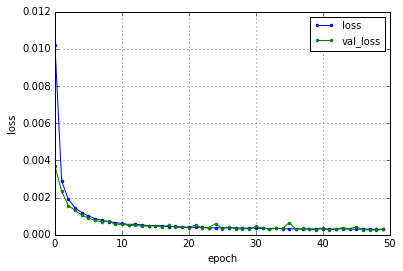

hiden node = 16
-edim=16-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0088 - val_loss: 0.0025
Epoch 2/50
1s - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
1s - loss: 8.7124e-04 - val_loss: 7.4698e-04
Epoch 7/50
1s - loss: 7.7504e-04 - val_loss: 0.0015
Epoch 8/50
1s - loss: 7.1592e-04 - val_loss: 6.9421e-04
Epoch 9/50
1s - loss: 6.2578e-04 - val_loss: 6.2010e-04
Epoch 10/50
1s - loss: 6.1319e-04 - val_loss: 7.9017e-04
Epoch 11/50
1s - loss: 5.8953e-04 - val_loss: 4.8676e-04
Epoch 12/50
1s - loss: 5.2477e-04 - val_loss: 4.4292e-04
Epoch 13/50
1s - loss: 5.6081e-04 - val_loss: 6.9562e-04
Epoch 14/50
1s - loss: 4.7610e-04 - val_loss: 4.1377e-04
Epoch 15/50
1s - loss: 4.5725e-04 - val_loss: 3.8434e-04
Epoch 16/50
1s - loss: 4.7439e-04 - val_loss: 3.9366e-04
Epoch 17/50
1s - loss: 4.2888e-04 - val

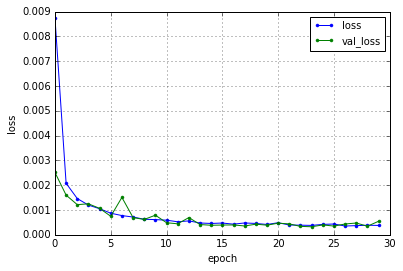

hiden node = 16
-edim=16-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0056 - val_loss: 0.0026
Epoch 2/50
1s - loss: 0.0023 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0022
Epoch 4/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 5/50
1s - loss: 0.0015 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 13/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 14/50
1s - loss: 9.7559e-04 - val_loss: 0.0012
Epoch 15/50
1s - loss: 9.4747e-04 - val_loss: 9.3090e-04
Epoch 16/50
1s - loss: 9.1714e-04 - val_loss: 9.0779e-04
Epoch 17/50
1s - loss: 8.9256e-04 - val_loss: 8.6611e-04
Epoch 18/50
1s - loss: 8.6413e-04 - val_los

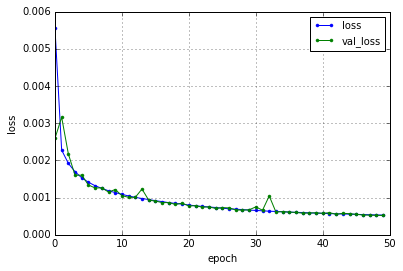

hiden node = 16
-edim=16-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0082 - val_loss: 0.0021
Epoch 2/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 3/50
1s - loss: 0.0017 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0016 - val_loss: 0.0055
Epoch 5/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0013 - val_loss: 8.0167e-04
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0024
Epoch 10/50
1s - loss: 0.0012 - val_loss: 8.9913e-04
Epoch 11/50
1s - loss: 0.0012 - val_loss: 6.9921e-04
Epoch 12/50
1s - loss: 0.0012 - val_loss: 8.2208e-04
Epoch 13/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 14/50
1s - loss: 0.0012 - val_loss: 6.7535e-04
Epoch 15/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0018
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0011 - val_loss: 6.4237e-0

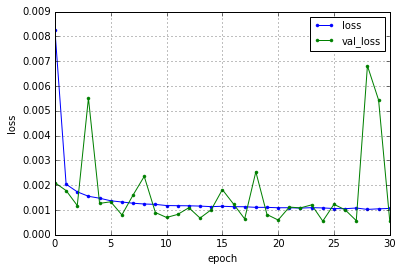

hiden node = 16
-edim=16-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0066 - val_loss: 0.0270
Epoch 2/50
1s - loss: 0.0022 - val_loss: 0.0015
Epoch 3/50
1s - loss: 0.0018 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0015 - val_loss: 9.7341e-04
Epoch 5/50
2s - loss: 0.0013 - val_loss: 8.8314e-04
Epoch 6/50
1s - loss: 0.0011 - val_loss: 0.0014
Epoch 7/50
1s - loss: 0.0011 - val_loss: 7.2166e-04
Epoch 8/50
1s - loss: 0.0011 - val_loss: 7.4997e-04
Epoch 9/50
1s - loss: 9.0991e-04 - val_loss: 7.0371e-04
Epoch 10/50
1s - loss: 9.9543e-04 - val_loss: 8.1991e-04
Epoch 11/50
1s - loss: 7.7511e-04 - val_loss: 5.4928e-04
Epoch 12/50
1s - loss: 7.9149e-04 - val_loss: 7.3165e-04
Epoch 13/50
1s - loss: 7.1132e-04 - val_loss: 5.0013e-04
Epoch 14/50
1s - loss: 7.0224e-04 - val_loss: 4.4634e-04
Epoch 15/50
1s - loss: 7.3988e-04 - val_loss: 5.4110e-04
Epoch 16/50
1s - loss: 6.6504e-04 - val_loss: 4.1459e-04
Epoch 17/50
1s - loss: 6.0907e-04 - val_lo

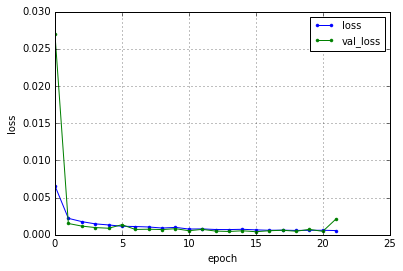

AccZ is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0863 - val_loss: 0.0805
Epoch 2/50
2s - loss: 0.0774 - val_loss: 0.0747
Epoch 3/50
2s - loss: 0.0722 - val_loss: 0.0695
Epoch 4/50
2s - loss: 0.0666 - val_loss: 0.0636
Epoch 5/50
2s - loss: 0.0605 - val_loss: 0.0573
Epoch 6/50
1s - loss: 0.0541 - val_loss: 0.0509
Epoch 7/50
2s - loss: 0.0479 - val_loss: 0.0450
Epoch 8/50
2s - loss: 0.0423 - val_loss: 0.0397
Epoch 9/50
2s - loss: 0.0375 - val_loss: 0.0353
Epoch 10/50
2s - loss: 0.0335 - val_loss: 0.0317
Epoch 11/50
2s - loss: 0.0303 - val_loss: 0.0289
Epoch 12/50
2s - loss: 0.0277 - val_loss: 0.0266
Epoch 13/50
1s - loss: 0.0257 - val_loss: 0.0248
Epoch 14/50
1s - loss: 0.0241 - val_loss: 0.0234
Epoch 15/50
2s - loss: 0.0228 - val_loss: 0.0223
Epoch 16/50
2s - loss: 0.0218 - val_loss

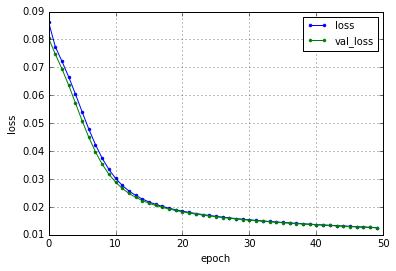

hiden node = 16
-edim=16-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0217 - val_loss: 0.0100
Epoch 2/50
1s - loss: 0.0078 - val_loss: 0.0064
Epoch 3/50
1s - loss: 0.0057 - val_loss: 0.0051
Epoch 4/50
1s - loss: 0.0047 - val_loss: 0.0044
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0041
Epoch 6/50
1s - loss: 0.0037 - val_loss: 0.0044
Epoch 7/50
1s - loss: 0.0034 - val_loss: 0.0037
Epoch 8/50
1s - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0027 - val_loss: 0.0029
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0033
Epoch 12/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0059
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0072
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 19/50
1s - loss

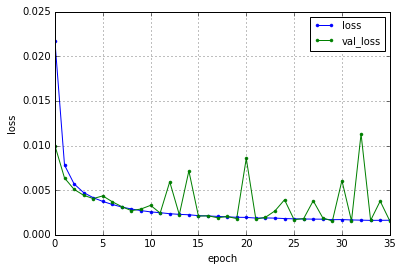

hiden node = 16
-edim=16-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0106 - val_loss: 0.0043
Epoch 2/50
2s - loss: 0.0036 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 4/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
2s - loss: 0.0011 - val_loss: 0.0012
Epoch 11/50
2s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
2s - loss: 0.0011 - val_loss: 9.1339e-04
Epoch 13/50
2s - loss: 9.9520e-04 - val_loss: 0.0013
Epoch 14/50
2s - loss: 9.4478e-04 - val_loss: 8.8789e-04
Epoch 15/50
2s - loss: 8.8673e-04 - val_loss: 8.5779e-04
Epoch 16/50
2s - loss: 8.6908e-04 - val_loss: 9.8793e-04
Epoch 17/50
1s - loss: 8.3775e-04 - val_loss: 7.8582e-04
Epoch 18/50
1s - loss: 8.3824e-0

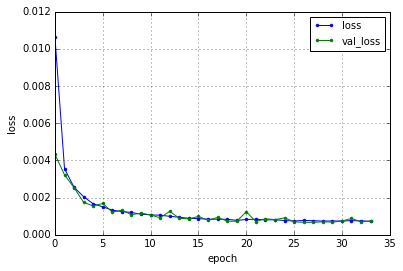

hiden node = 16
-edim=16-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0124 - val_loss: 0.0057
Epoch 2/50
2s - loss: 0.0031 - val_loss: 0.0024
Epoch 3/50
2s - loss: 0.0022 - val_loss: 0.0031
Epoch 4/50
2s - loss: 0.0020 - val_loss: 0.0016
Epoch 5/50
2s - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
2s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
2s - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
2s - loss: 0.0012 - val_loss: 0.0010
Epoch 9/50
2s - loss: 0.0011 - val_loss: 0.0011
Epoch 10/50
2s - loss: 0.0011 - val_loss: 9.3046e-04
Epoch 11/50
2s - loss: 9.6352e-04 - val_loss: 0.0042
Epoch 12/50
2s - loss: 0.0011 - val_loss: 8.0816e-04
Epoch 13/50
2s - loss: 8.7137e-04 - val_loss: 0.0011
Epoch 14/50
2s - loss: 0.0011 - val_loss: 9.1226e-04
Epoch 15/50
2s - loss: 8.5071e-04 - val_loss: 9.4352e-04
Epoch 16/50
1s - loss: 9.5939e-04 - val_loss: 7.3355e-04
Epoch 17/50
1s - loss: 9.0575e-04 - val_loss: 7.6761e-04
Epoch 18/50
1s - loss: 8.5813e

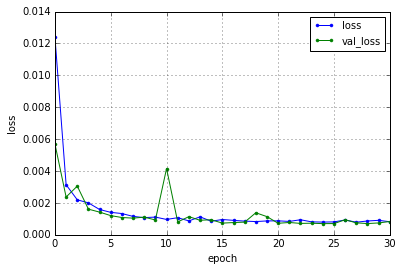

hiden node = 16
-edim=16-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0071 - val_loss: 0.0617
Epoch 2/50
1s - loss: 0.0035 - val_loss: 0.0030
Epoch 3/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 4/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0022 - val_loss: 0.0052
Epoch 6/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0119
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0015 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0014 - val_loss: 0.0015
Epoch 15/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0015
Epoch 18/50
1s - loss: 0.0013 - val_loss: 0.0067
Epoch 19/50
1s - loss:

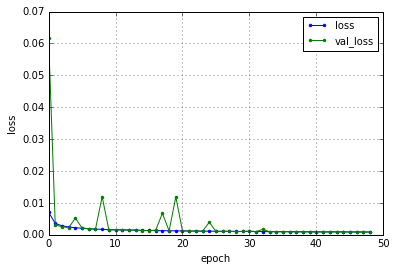

hiden node = 16
-edim=16-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0094 - val_loss: 0.0034
Epoch 2/50
0s - loss: 0.0035 - val_loss: 0.0040
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0023
Epoch 4/50
0s - loss: 0.0029 - val_loss: 0.0020
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0026 - val_loss: 0.0045
Epoch 7/50
1s - loss: 0.0025 - val_loss: 0.0034
Epoch 8/50
1s - loss: 0.0024 - val_loss: 0.0229
Epoch 9/50
1s - loss: 0.0024 - val_loss: 0.0165
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0017
Epoch 11/50
0s - loss: 0.0023 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0023 - val_loss: 0.0015
Epoch 13/50
0s - loss: 0.0023 - val_loss: 0.0115
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0023 - val_loss: 0.0027
Epoch 16/50
1s - loss: 0.0022 - val_loss: 0.0081
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0065
Epoch 18/50
1s - loss: 0.0022 - val_loss: 0.0048


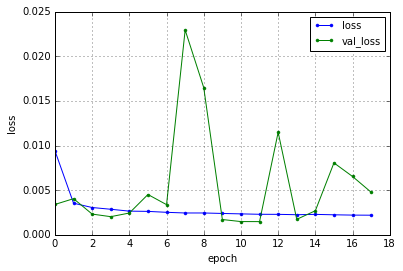

hiden node = 16
-edim=16-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0090 - val_loss: 0.0098
Epoch 2/50
1s - loss: 0.0037 - val_loss: 0.0068
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0481
Epoch 4/50
0s - loss: 0.0029 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0025 - val_loss: 0.0020
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0062
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0015
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0013
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0018 - val_loss: 0.0013
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 13/50
1s - loss: 0.0018 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0016 - val_loss: 0.0071
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0014 - val_loss: 0.0011
Epoch 17/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0014 - val_loss: 0.0010
Epoch 19/50
1s - loss: 0

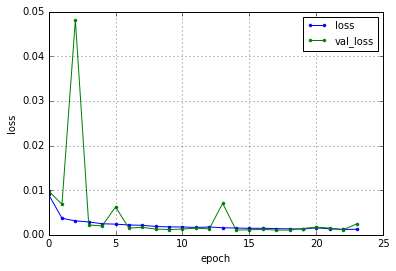

AccZ is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0828 - val_loss: 0.0803
Epoch 2/50
1s - loss: 0.0787 - val_loss: 0.0772
Epoch 3/50
1s - loss: 0.0758 - val_loss: 0.0743
Epoch 4/50
1s - loss: 0.0727 - val_loss: 0.0710
Epoch 5/50
1s - loss: 0.0692 - val_loss: 0.0673
Epoch 6/50
1s - loss: 0.0654 - val_loss: 0.0634
Epoch 7/50
1s - loss: 0.0613 - val_loss: 0.0593
Epoch 8/50
1s - loss: 0.0573 - val_loss: 0.0553
Epoch 9/50
1s - loss: 0.0534 - val_loss: 0.0516
Epoch 10/50
1s - loss: 0.0498 - val_loss: 0.0481
Epoch 11/50
1s - loss: 0.0465 - val_loss: 0.0450
Epoch 12/50
1s - loss: 0.0437 - val_loss: 0.0423
Epoch 13/50
1s - loss: 0.0411 - val_loss: 0.0400
Epoch 14/50
1s - loss: 0.0389 - val_loss: 0.0380
Epoch 15/50
1s - loss: 0.0371 - val_loss: 0.0362
Epoch 16/50
1s - loss: 0.0355 - val_loss

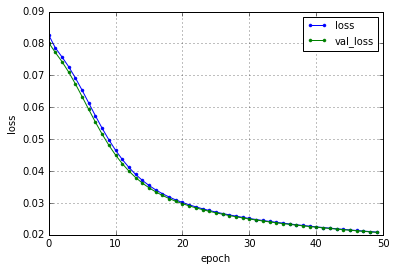

hiden node = 16
-edim=16-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0300 - val_loss: 0.0164
Epoch 2/50
1s - loss: 0.0134 - val_loss: 0.0113
Epoch 3/50
1s - loss: 0.0101 - val_loss: 0.0093
Epoch 4/50
1s - loss: 0.0082 - val_loss: 0.0078
Epoch 5/50
1s - loss: 0.0070 - val_loss: 0.0069
Epoch 6/50
1s - loss: 0.0063 - val_loss: 0.0060
Epoch 7/50
1s - loss: 0.0058 - val_loss: 0.0060
Epoch 8/50
1s - loss: 0.0055 - val_loss: 0.0055
Epoch 9/50
1s - loss: 0.0052 - val_loss: 0.0051
Epoch 10/50
1s - loss: 0.0050 - val_loss: 0.0057
Epoch 11/50
1s - loss: 0.0047 - val_loss: 0.0044
Epoch 12/50
1s - loss: 0.0046 - val_loss: 0.0053
Epoch 13/50
1s - loss: 0.0044 - val_loss: 0.0041
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0044
Epoch 15/50
1s - loss: 0.0042 - val_loss: 0.0039
Epoch 16/50
1s - loss: 0.0042 - val_loss: 0.0043
Epoch 17/50
1s - loss: 0.0040 - val_loss: 0.0037
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0040
Epoch 19/50
1s - loss

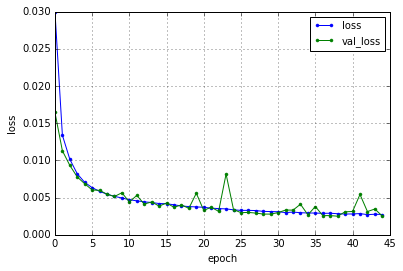

hiden node = 16
-edim=16-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0132 - val_loss: 0.0063
Epoch 2/50
1s - loss: 0.0051 - val_loss: 0.0042
Epoch 3/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0025
Epoch 5/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 14/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 19/50
1s - loss: 

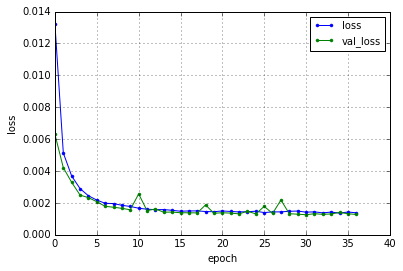

hiden node = 16
-edim=16-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0136 - val_loss: 0.0053
Epoch 2/50
1s - loss: 0.0044 - val_loss: 0.0038
Epoch 3/50
1s - loss: 0.0033 - val_loss: 0.0026
Epoch 4/50
1s - loss: 0.0026 - val_loss: 0.0031
Epoch 5/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0023
Epoch 11/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 12/50
1s - loss: 0.0021 - val_loss: 0.0018
Epoch 13/50
1s - loss: 0.0018 - val_loss: 0.0020
Epoch 14/50
1s - loss: 0.0019 - val_loss: 0.0033


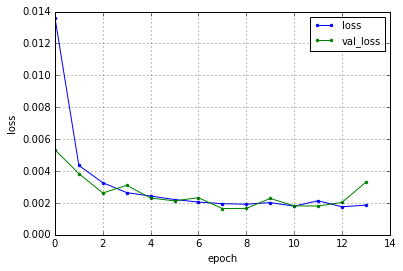

hiden node = 16
-edim=16-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0105 - val_loss: 0.0057
Epoch 2/50
1s - loss: 0.0051 - val_loss: 0.0042
Epoch 3/50
1s - loss: 0.0042 - val_loss: 0.0036
Epoch 4/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 5/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0032
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
1s - loss: 0.0028 - val_loss: 0.0025
Epoch 9/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 10/50
1s - loss: 0.0025 - val_loss: 0.0023
Epoch 11/50
2s - loss: 0.0024 - val_loss: 0.0023
Epoch 12/50
2s - loss: 0.0023 - val_loss: 0.0041
Epoch 13/50
2s - loss: 0.0023 - val_loss: 0.0022
Epoch 14/50
2s - loss: 0.0022 - val_loss: 0.0021
Epoch 15/50
2s - loss: 0.0022 - val_loss: 0.0022
Epoch 16/50
2s - loss: 0.0021 - val_loss: 0.0020
Epoch 17/50
2s - loss: 0.0021 - val_loss: 0.0020
Epoch 18/50
1s - loss: 0.0020 - val_loss: 0.0021
Epoch 19/50
1s - loss:

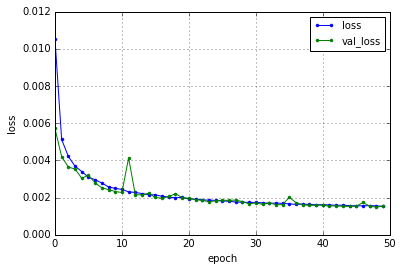

hiden node = 16
-edim=16-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0122 - val_loss: 0.0056
Epoch 2/50
1s - loss: 0.0060 - val_loss: 0.0066
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0035
Epoch 4/50
1s - loss: 0.0050 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0048 - val_loss: 0.0050
Epoch 6/50
1s - loss: 0.0047 - val_loss: 0.0030
Epoch 7/50
1s - loss: 0.0046 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0046 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0045 - val_loss: 0.0029
Epoch 10/50
1s - loss: 0.0045 - val_loss: 0.0070
Epoch 11/50
1s - loss: 0.0045 - val_loss: 0.0028
Epoch 12/50
1s - loss: 0.0044 - val_loss: 0.0034
Epoch 13/50
1s - loss: 0.0043 - val_loss: 0.0029
Epoch 14/50
1s - loss: 0.0044 - val_loss: 0.0028
Epoch 15/50
1s - loss: 0.0043 - val_loss: 0.0032
Epoch 16/50
1s - loss: 0.0043 - val_loss: 0.0039
Epoch 17/50
1s - loss: 0.0044 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0043 - val_loss: 0.0034
Epoch 19/50
1s - loss:

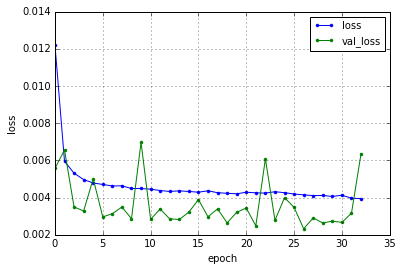

hiden node = 16
-edim=16-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0122 - val_loss: 0.0072
Epoch 2/50
1s - loss: 0.0066 - val_loss: 0.0117
Epoch 3/50
1s - loss: 0.0055 - val_loss: 0.0035
Epoch 4/50
1s - loss: 0.0047 - val_loss: 0.0055
Epoch 5/50
1s - loss: 0.0045 - val_loss: 0.0031
Epoch 6/50
1s - loss: 0.0045 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0038 - val_loss: 0.0028
Epoch 8/50
1s - loss: 0.0038 - val_loss: 0.0077
Epoch 9/50
1s - loss: 0.0038 - val_loss: 0.0023
Epoch 10/50
1s - loss: 0.0035 - val_loss: 0.0104
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0024
Epoch 12/50
1s - loss: 0.0031 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0042
Epoch 14/50
1s - loss: 0.0029 - val_loss: 0.0021
Epoch 15/50
1s - loss: 0.0031 - val_loss: 0.0024
Epoch 16/50
1s - loss: 0.0027 - val_loss: 0.0020
Epoch 17/50
1s - loss: 0.0026 - val_loss: 0.0019
Epoch 18/50
1s - loss: 0.0026 - val_loss: 0.0019
Epoch 19/50
1s - loss: 0

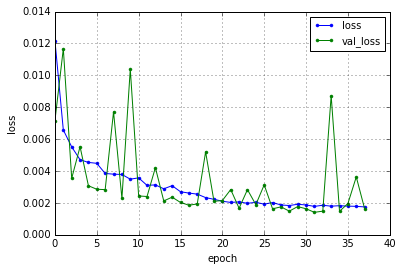

AccZ is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0830 - val_loss: 0.0818
Epoch 2/50
2s - loss: 0.0811 - val_loss: 0.0804
Epoch 3/50
2s - loss: 0.0799 - val_loss: 0.0793
Epoch 4/50
2s - loss: 0.0787 - val_loss: 0.0780
Epoch 5/50
1s - loss: 0.0773 - val_loss: 0.0766
Epoch 6/50
2s - loss: 0.0758 - val_loss: 0.0749
Epoch 7/50
2s - loss: 0.0740 - val_loss: 0.0731
Epoch 8/50
1s - loss: 0.0721 - val_loss: 0.0711
Epoch 9/50
1s - loss: 0.0701 - val_loss: 0.0690
Epoch 10/50
2s - loss: 0.0680 - val_loss: 0.0669
Epoch 11/50
1s - loss: 0.0658 - val_loss: 0.0647
Epoch 12/50
2s - loss: 0.0636 - val_loss: 0.0626
Epoch 13/50
2s - loss: 0.0615 - val_loss: 0.0605
Epoch 14/50
2s - loss: 0.0595 - val_loss: 0.0585
Epoch 15/50
2s - loss: 0.0575 - val_loss: 0.0566
Epoch 16/50
2s - loss: 0.0557 - val_lo

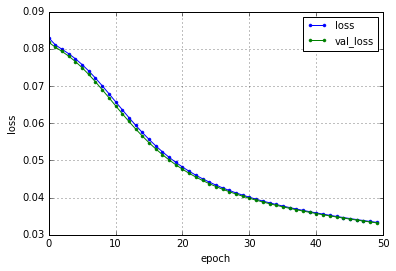

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0407 - val_loss: 0.0256
Epoch 2/50
1s - loss: 0.0212 - val_loss: 0.0185
Epoch 3/50
2s - loss: 0.0164 - val_loss: 0.0153
Epoch 4/50
2s - loss: 0.0140 - val_loss: 0.0131
Epoch 5/50
2s - loss: 0.0126 - val_loss: 0.0118
Epoch 6/50
1s - loss: 0.0115 - val_loss: 0.0109
Epoch 7/50
2s - loss: 0.0107 - val_loss: 0.0107
Epoch 8/50
2s - loss: 0.0101 - val_loss: 0.0094
Epoch 9/50
2s - loss: 0.0095 - val_loss: 0.0090
Epoch 10/50
2s - loss: 0.0091 - val_loss: 0.0085
Epoch 11/50
2s - loss: 0.0087 - val_loss: 0.0084
Epoch 12/50
1s - loss: 0.0083 - val_loss: 0.0082
Epoch 13/50
1s - loss: 0.0081 - val_loss: 0.0076
Epoch 14/50
1s - loss: 0.0078 - val_loss: 0.0076
Epoch 15/50
2s - loss: 0.0076 - val_loss: 0.0071
Epoch 16/50
1s - loss: 0.0075 - val_loss: 0.0075
Epoch 17/50
1s - loss: 0.0073 - val_loss: 0.0070
Epoch 18/50
1s - loss: 0.0071 - val_loss: 0.0069
Epoch 19/50
1s - los

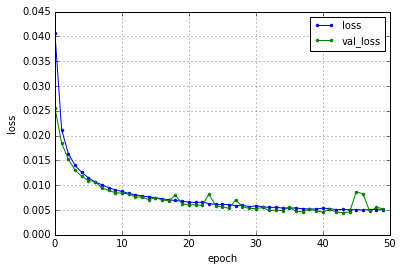

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0158 - val_loss: 0.0092
Epoch 2/50
2s - loss: 0.0072 - val_loss: 0.0058
Epoch 3/50
2s - loss: 0.0054 - val_loss: 0.0044
Epoch 4/50
2s - loss: 0.0043 - val_loss: 0.0057
Epoch 5/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 6/50
1s - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
2s - loss: 0.0033 - val_loss: 0.0039
Epoch 8/50
2s - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
2s - loss: 0.0034 - val_loss: 0.0030
Epoch 10/50
2s - loss: 0.0032 - val_loss: 0.0046
Epoch 11/50
2s - loss: 0.0032 - val_loss: 0.0029
Epoch 12/50
2s - loss: 0.0031 - val_loss: 0.0032
Epoch 13/50
2s - loss: 0.0030 - val_loss: 0.0031
Epoch 14/50
2s - loss: 0.0030 - val_loss: 0.0028
Epoch 15/50
2s - loss: 0.0031 - val_loss: 0.0028
Epoch 16/50
2s - loss: 0.0030 - val_loss: 0.0027
Epoch 17/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0029 - val_loss: 0.0030
Epoch 19/50
1s - loss:

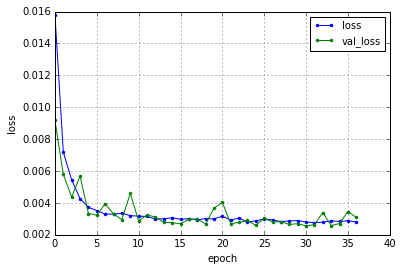

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0167 - val_loss: 0.0079
Epoch 2/50
1s - loss: 0.0067 - val_loss: 0.0069
Epoch 3/50
1s - loss: 0.0051 - val_loss: 0.0045
Epoch 4/50
1s - loss: 0.0045 - val_loss: 0.0042
Epoch 5/50
1s - loss: 0.0041 - val_loss: 0.0038
Epoch 6/50
1s - loss: 0.0038 - val_loss: 0.0041
Epoch 7/50
2s - loss: 0.0038 - val_loss: 0.0032
Epoch 8/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 10/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 12/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 13/50
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 14/50
1s - loss: 0.0036 - val_loss: 0.0038
Epoch 15/50
1s - loss: 0.0038 - val_loss: 0.0032
Epoch 16/50
1s - loss: 0.0037 - val_loss: 0.0031
Epoch 17/50
1s - loss: 0.0038 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0035 - val_loss: 0.0036
Epoch 19/50
1s - loss: 0

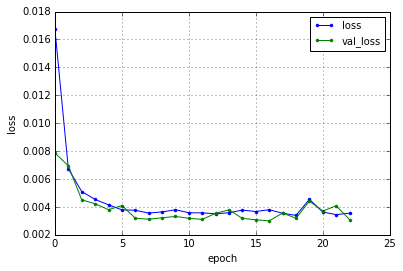

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0162 - val_loss: 0.0093
Epoch 2/50
1s - loss: 0.0088 - val_loss: 0.0084
Epoch 3/50
2s - loss: 0.0070 - val_loss: 0.0060
Epoch 4/50
2s - loss: 0.0061 - val_loss: 0.0054
Epoch 5/50
2s - loss: 0.0055 - val_loss: 0.0056
Epoch 6/50
2s - loss: 0.0051 - val_loss: 0.0046
Epoch 7/50
2s - loss: 0.0048 - val_loss: 0.0044
Epoch 8/50
2s - loss: 0.0046 - val_loss: 0.0041
Epoch 9/50
1s - loss: 0.0043 - val_loss: 0.0051
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0038
Epoch 11/50
1s - loss: 0.0041 - val_loss: 0.0043
Epoch 12/50
2s - loss: 0.0040 - val_loss: 0.0038
Epoch 13/50
2s - loss: 0.0039 - val_loss: 0.0036
Epoch 14/50
2s - loss: 0.0037 - val_loss: 0.0043
Epoch 15/50
2s - loss: 0.0037 - val_loss: 0.0035
Epoch 16/50
2s - loss: 0.0035 - val_loss: 0.0034
Epoch 17/50
2s - loss: 0.0035 - val_loss: 0.0039
Epoch 18/50
2s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
2s - loss

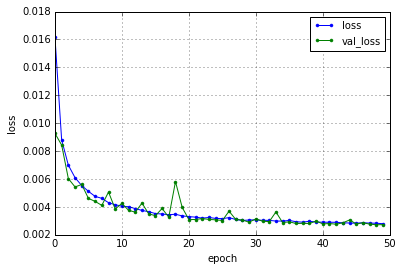

hiden node = 16
-edim=16-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0174 - val_loss: 0.0178
Epoch 2/50
2s - loss: 0.0102 - val_loss: 0.0122
Epoch 3/50
1s - loss: 0.0092 - val_loss: 0.0151
Epoch 4/50
1s - loss: 0.0087 - val_loss: 0.0056
Epoch 5/50
1s - loss: 0.0087 - val_loss: 0.0067
Epoch 6/50
1s - loss: 0.0085 - val_loss: 0.0112
Epoch 7/50
1s - loss: 0.0083 - val_loss: 0.0057
Epoch 8/50
1s - loss: 0.0084 - val_loss: 0.0079
Epoch 9/50
1s - loss: 0.0081 - val_loss: 0.0070
Epoch 10/50
1s - loss: 0.0082 - val_loss: 0.0066


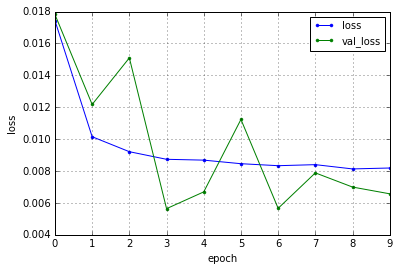

hiden node = 16
-edim=16-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0187 - val_loss: 0.0091
Epoch 2/50
2s - loss: 0.0113 - val_loss: 0.0087
Epoch 3/50
1s - loss: 0.0098 - val_loss: 0.0213
Epoch 4/50
1s - loss: 0.0096 - val_loss: 0.0097
Epoch 5/50
1s - loss: 0.0088 - val_loss: 0.0066
Epoch 6/50
1s - loss: 0.0138 - val_loss: 0.0058
Epoch 7/50
1s - loss: 0.0079 - val_loss: 0.0055
Epoch 8/50
1s - loss: 0.0076 - val_loss: 0.0112
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0058
Epoch 10/50
1s - loss: 0.0071 - val_loss: 0.0046
Epoch 11/50
1s - loss: 0.0066 - val_loss: 0.0044
Epoch 12/50
1s - loss: 0.0075 - val_loss: 0.0051
Epoch 13/50
1s - loss: 0.0060 - val_loss: 0.0249
Epoch 14/50
1s - loss: 0.0063 - val_loss: 0.0146
Epoch 15/50
1s - loss: 0.0062 - val_loss: 0.0046
Epoch 16/50
2s - loss: 0.0061 - val_loss: 0.0044
Epoch 17/50
1s - loss: 0.0056 - val_loss: 0.0045
Epoch 18/50
1s - loss: 0.0060 - val_loss: 0.0096
Epoch 19/50
2s - loss: 

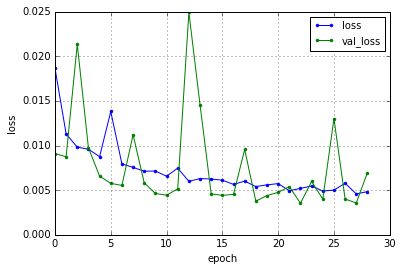

AccZ is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0830 - val_loss: 0.0826
Epoch 2/50
3s - loss: 0.0823 - val_loss: 0.0820
Epoch 3/50
4s - loss: 0.0817 - val_loss: 0.0815
Epoch 4/50
3s - loss: 0.0813 - val_loss: 0.0810
Epoch 5/50
3s - loss: 0.0807 - val_loss: 0.0805
Epoch 6/50
3s - loss: 0.0802 - val_loss: 0.0798
Epoch 7/50
3s - loss: 0.0795 - val_loss: 0.0791
Epoch 8/50
3s - loss: 0.0787 - val_loss: 0.0783
Epoch 9/50
3s - loss: 0.0779 - val_loss: 0.0774
Epoch 10/50
3s - loss: 0.0770 - val_loss: 0.0765
Epoch 11/50
3s - loss: 0.0760 - val_loss: 0.0755
Epoch 12/50
3s - loss: 0.0749 - val_loss: 0.0744
Epoch 13/50
3s - loss: 0.0739 - val_loss: 0.0733
Epoch 14/50
4s - loss: 0.0728 - val_loss: 0.0722
Epoch 15/50
3s - loss: 0.0717 - val_loss: 0.0711
Epoch 16/50
3s - loss: 0.0705 - val_lo

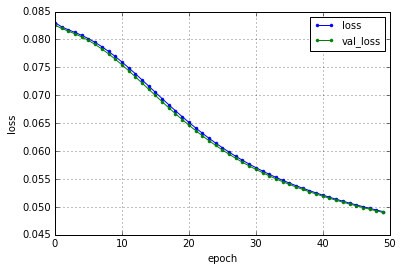

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0538 - val_loss: 0.0396
Epoch 2/50
4s - loss: 0.0344 - val_loss: 0.0303
Epoch 3/50
3s - loss: 0.0275 - val_loss: 0.0250
Epoch 4/50
3s - loss: 0.0234 - val_loss: 0.0219
Epoch 5/50
3s - loss: 0.0209 - val_loss: 0.0199
Epoch 6/50
3s - loss: 0.0192 - val_loss: 0.0185
Epoch 7/50
4s - loss: 0.0181 - val_loss: 0.0173
Epoch 8/50
3s - loss: 0.0171 - val_loss: 0.0176
Epoch 9/50
3s - loss: 0.0163 - val_loss: 0.0157
Epoch 10/50
4s - loss: 0.0156 - val_loss: 0.0148
Epoch 11/50
3s - loss: 0.0149 - val_loss: 0.0145
Epoch 12/50
3s - loss: 0.0144 - val_loss: 0.0139
Epoch 13/50
3s - loss: 0.0140 - val_loss: 0.0135
Epoch 14/50
3s - loss: 0.0136 - val_loss: 0.0129
Epoch 15/50
4s - loss: 0.0133 - val_loss: 0.0127
Epoch 16/50
4s - loss: 0.0130 - val_loss: 0.0126
Epoch 17/50
4s - loss: 0.0128 - val_loss: 0.0124
Epoch 18/50
3s - loss: 0.0126 - val_loss: 0.0132
Epoch 19/50
5s - los

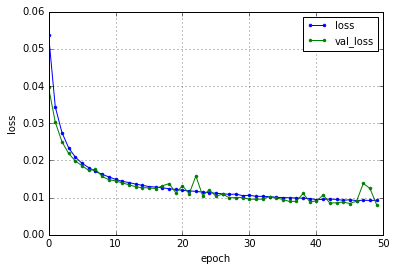

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0221 - val_loss: 0.0127
Epoch 2/50
3s - loss: 0.0111 - val_loss: 0.0101
Epoch 3/50
3s - loss: 0.0086 - val_loss: 0.0076
Epoch 4/50
3s - loss: 0.0073 - val_loss: 0.0069
Epoch 5/50
4s - loss: 0.0070 - val_loss: 0.0066
Epoch 6/50
4s - loss: 0.0070 - val_loss: 0.0063
Epoch 7/50
4s - loss: 0.0066 - val_loss: 0.0081
Epoch 8/50
4s - loss: 0.0066 - val_loss: 0.0069
Epoch 9/50
4s - loss: 0.0067 - val_loss: 0.0069
Epoch 10/50
4s - loss: 0.0063 - val_loss: 0.0083
Epoch 11/50
4s - loss: 0.0065 - val_loss: 0.0066
Epoch 12/50
3s - loss: 0.0063 - val_loss: 0.0060
Epoch 13/50
3s - loss: 0.0063 - val_loss: 0.0062
Epoch 14/50
3s - loss: 0.0062 - val_loss: 0.0079
Epoch 15/50
4s - loss: 0.0064 - val_loss: 0.0060
Epoch 16/50
4s - loss: 0.0063 - val_loss: 0.0057
Epoch 17/50
4s - loss: 0.0064 - val_loss: 0.0062
Epoch 18/50
3s - loss: 0.0063 - val_loss: 0.0058
Epoch 19/50
4s - loss:

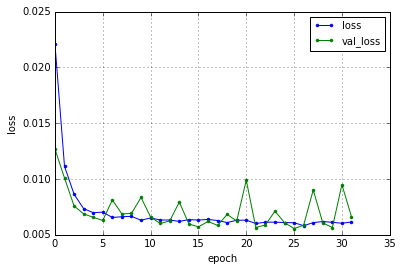

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0217 - val_loss: 0.0116
Epoch 2/50
5s - loss: 0.0117 - val_loss: 0.0095
Epoch 3/50
6s - loss: 0.0099 - val_loss: 0.0083
Epoch 4/50
6s - loss: 0.0089 - val_loss: 0.0086
Epoch 5/50
6s - loss: 0.0090 - val_loss: 0.0077
Epoch 6/50
6s - loss: 0.0082 - val_loss: 0.0073
Epoch 7/50
4s - loss: 0.0075 - val_loss: 0.0110
Epoch 8/50
4s - loss: 0.0080 - val_loss: 0.0092
Epoch 9/50
4s - loss: 0.0073 - val_loss: 0.0104
Epoch 10/50
4s - loss: 0.0076 - val_loss: 0.0088
Epoch 11/50
4s - loss: 0.0079 - val_loss: 0.0071
Epoch 12/50
3s - loss: 0.0080 - val_loss: 0.0067
Epoch 13/50
3s - loss: 0.0078 - val_loss: 0.0071
Epoch 14/50
4s - loss: 0.0079 - val_loss: 0.0067
Epoch 15/50
3s - loss: 0.0078 - val_loss: 0.0083
Epoch 16/50
4s - loss: 0.0071 - val_loss: 0.0072
Epoch 17/50
3s - loss: 0.0072 - val_loss: 0.0066
Epoch 18/50
3s - loss: 0.0077 - val_loss: 0.0068
Epoch 19/50
4s - loss: 0

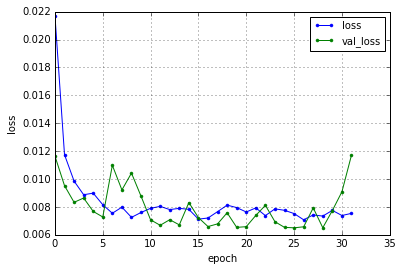

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0219 - val_loss: 0.0135
Epoch 2/50
4s - loss: 0.0132 - val_loss: 0.0111
Epoch 3/50
4s - loss: 0.0110 - val_loss: 0.0095
Epoch 4/50
4s - loss: 0.0099 - val_loss: 0.0089
Epoch 5/50
3s - loss: 0.0092 - val_loss: 0.0088
Epoch 6/50
3s - loss: 0.0085 - val_loss: 0.0092
Epoch 7/50
3s - loss: 0.0082 - val_loss: 0.0106
Epoch 8/50
3s - loss: 0.0079 - val_loss: 0.0075
Epoch 9/50
3s - loss: 0.0078 - val_loss: 0.0073
Epoch 10/50
5s - loss: 0.0074 - val_loss: 0.0096
Epoch 11/50
4s - loss: 0.0073 - val_loss: 0.0067
Epoch 12/50
3s - loss: 0.0072 - val_loss: 0.0068
Epoch 13/50
3s - loss: 0.0071 - val_loss: 0.0065
Epoch 14/50
3s - loss: 0.0071 - val_loss: 0.0069
Epoch 15/50
3s - loss: 0.0068 - val_loss: 0.0082
Epoch 16/50
3s - loss: 0.0068 - val_loss: 0.0063
Epoch 17/50
4s - loss: 0.0067 - val_loss: 0.0066
Epoch 18/50
3s - loss: 0.0067 - val_loss: 0.0062
Epoch 19/50
3s - loss

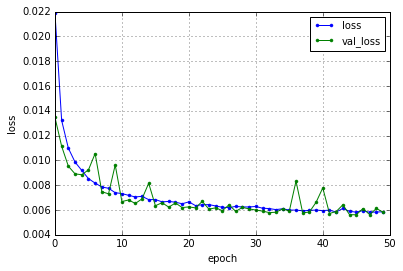

hiden node = 16
-edim=16-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0236 - val_loss: 0.0143
Epoch 2/50
3s - loss: 0.0165 - val_loss: 0.0120
Epoch 3/50
3s - loss: 0.0154 - val_loss: 0.0116
Epoch 4/50
3s - loss: 0.0151 - val_loss: 0.0144
Epoch 5/50
4s - loss: 0.0149 - val_loss: 0.0128
Epoch 6/50
4s - loss: 0.0149 - val_loss: 0.0124
Epoch 7/50
4s - loss: 0.0148 - val_loss: 0.0140
Epoch 8/50
4s - loss: 0.0146 - val_loss: 0.0115
Epoch 9/50
3s - loss: 0.0148 - val_loss: 0.0158
Epoch 10/50
4s - loss: 0.0147 - val_loss: 0.0113
Epoch 11/50
4s - loss: 0.0146 - val_loss: 0.0105
Epoch 12/50
3s - loss: 0.0146 - val_loss: 0.0137
Epoch 13/50
4s - loss: 0.0144 - val_loss: 0.0256
Epoch 14/50
4s - loss: 0.0147 - val_loss: 0.0114
Epoch 15/50
3s - loss: 0.0146 - val_loss: 0.0105
Epoch 16/50
3s - loss: 0.0145 - val_loss: 0.0250
Epoch 17/50
4s - loss: 0.0143 - val_loss: 0.0228


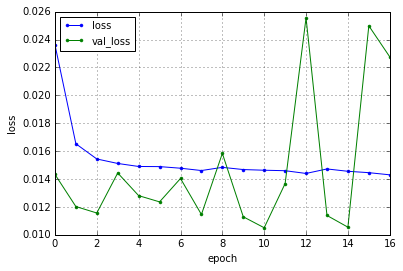

hiden node = 16
-edim=16-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0260 - val_loss: 0.0263
Epoch 2/50
3s - loss: 0.0188 - val_loss: 0.0176
Epoch 3/50
3s - loss: 0.0196 - val_loss: 0.0142
Epoch 4/50
3s - loss: 0.0195 - val_loss: 0.0160
Epoch 5/50
3s - loss: 0.0190 - val_loss: 0.0213
Epoch 6/50
3s - loss: 0.0167 - val_loss: 0.0164
Epoch 7/50
4s - loss: 0.0198 - val_loss: 0.0238
Epoch 8/50
4s - loss: 0.0176 - val_loss: 0.0145
Epoch 9/50
4s - loss: 0.0177 - val_loss: 0.0147


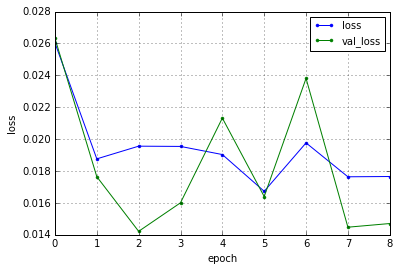

AccZ is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0833 - val_loss: 0.0831
Epoch 2/50
6s - loss: 0.0830 - val_loss: 0.0829
Epoch 3/50
7s - loss: 0.0828 - val_loss: 0.0827
Epoch 4/50
6s - loss: 0.0827 - val_loss: 0.0826
Epoch 5/50
6s - loss: 0.0825 - val_loss: 0.0824
Epoch 6/50
6s - loss: 0.0824 - val_loss: 0.0823
Epoch 7/50
6s - loss: 0.0822 - val_loss: 0.0822
Epoch 8/50
6s - loss: 0.0821 - val_loss: 0.0820
Epoch 9/50
9s - loss: 0.0819 - val_loss: 0.0818
Epoch 10/50
6s - loss: 0.0817 - val_loss: 0.0816
Epoch 11/50
6s - loss: 0.0815 - val_loss: 0.0813
Epoch 12/50
6s - loss: 0.0812 - val_loss: 0.0811
Epoch 13/50
7s - loss: 0.0810 - val_loss: 0.0808
Epoch 14/50
6s - loss: 0.0807 - val_loss: 0.0805
Epoch 15/50
6s - loss: 0.0804 - val_loss: 0.0802
Epoch 16/50
6s - loss: 0.0800 - val_lo

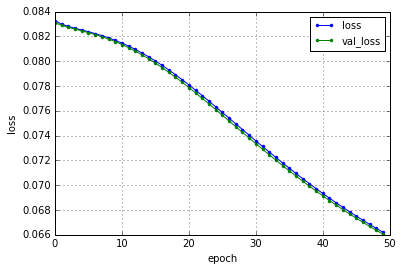

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0678 - val_loss: 0.0566
Epoch 2/50
6s - loss: 0.0513 - val_loss: 0.0469
Epoch 3/50
6s - loss: 0.0438 - val_loss: 0.0410
Epoch 4/50
6s - loss: 0.0388 - val_loss: 0.0366
Epoch 5/50
6s - loss: 0.0349 - val_loss: 0.0331
Epoch 6/50
6s - loss: 0.0318 - val_loss: 0.0304
Epoch 7/50
6s - loss: 0.0293 - val_loss: 0.0283
Epoch 8/50
5s - loss: 0.0274 - val_loss: 0.0267
Epoch 9/50
5s - loss: 0.0258 - val_loss: 0.0255
Epoch 10/50
6s - loss: 0.0246 - val_loss: 0.0242
Epoch 11/50
6s - loss: 0.0236 - val_loss: 0.0232
Epoch 12/50
6s - loss: 0.0228 - val_loss: 0.0224
Epoch 13/50
6s - loss: 0.0221 - val_loss: 0.0219
Epoch 14/50
6s - loss: 0.0215 - val_loss: 0.0211
Epoch 15/50
6s - loss: 0.0210 - val_loss: 0.0207
Epoch 16/50
6s - loss: 0.0206 - val_loss: 0.0201
Epoch 17/50
6s - loss: 0.0202 - val_loss: 0.0197
Epoch 18/50
6s - loss: 0.0199 - val_loss: 0.0196
Epoch 19/50
6s - los

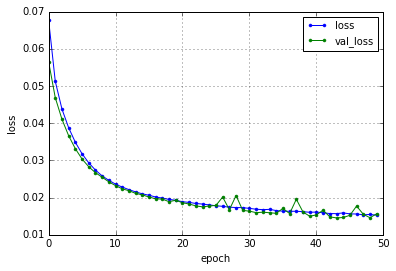

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0262 - val_loss: 0.0168
Epoch 2/50
5s - loss: 0.0151 - val_loss: 0.0131
Epoch 3/50
5s - loss: 0.0131 - val_loss: 0.0117
Epoch 4/50
5s - loss: 0.0123 - val_loss: 0.0128
Epoch 5/50
5s - loss: 0.0125 - val_loss: 0.0122
Epoch 6/50
5s - loss: 0.0117 - val_loss: 0.0122
Epoch 7/50
5s - loss: 0.0120 - val_loss: 0.0117
Epoch 8/50
5s - loss: 0.0117 - val_loss: 0.0122
Epoch 9/50
5s - loss: 0.0119 - val_loss: 0.0115
Epoch 10/50
5s - loss: 0.0117 - val_loss: 0.0126
Epoch 11/50
5s - loss: 0.0117 - val_loss: 0.0111
Epoch 12/50
5s - loss: 0.0117 - val_loss: 0.0118
Epoch 13/50
5s - loss: 0.0120 - val_loss: 0.0118
Epoch 14/50
5s - loss: 0.0117 - val_loss: 0.0169
Epoch 15/50
5s - loss: 0.0112 - val_loss: 0.0114
Epoch 16/50
5s - loss: 0.0113 - val_loss: 0.0106
Epoch 17/50
5s - loss: 0.0115 - val_loss: 0.0106
Epoch 18/50
5s - loss: 0.0116 - val_loss: 0.0110
Epoch 19/50
5s - loss:

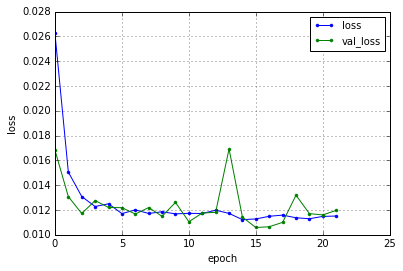

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0292 - val_loss: 0.0208
Epoch 2/50
5s - loss: 0.0197 - val_loss: 0.0178
Epoch 3/50
5s - loss: 0.0189 - val_loss: 0.0152
Epoch 4/50
5s - loss: 0.0178 - val_loss: 0.0158
Epoch 5/50
5s - loss: 0.0168 - val_loss: 0.0153
Epoch 6/50
5s - loss: 0.0165 - val_loss: 0.0164
Epoch 7/50
5s - loss: 0.0165 - val_loss: 0.0145
Epoch 8/50
5s - loss: 0.0163 - val_loss: 0.0139
Epoch 9/50
5s - loss: 0.0150 - val_loss: 0.0139
Epoch 10/50
5s - loss: 0.0152 - val_loss: 0.0128
Epoch 11/50
5s - loss: 0.0165 - val_loss: 0.0183
Epoch 12/50
5s - loss: 0.0154 - val_loss: 0.0143
Epoch 13/50
5s - loss: 0.0163 - val_loss: 0.0147
Epoch 14/50
5s - loss: 0.0155 - val_loss: 0.0176
Epoch 15/50
5s - loss: 0.0150 - val_loss: 0.0184
Epoch 16/50
5s - loss: 0.0160 - val_loss: 0.0140


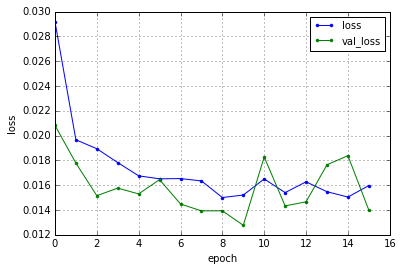

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0307 - val_loss: 0.0230
Epoch 2/50
5s - loss: 0.0220 - val_loss: 0.0183
Epoch 3/50
5s - loss: 0.0186 - val_loss: 0.0158
Epoch 4/50
5s - loss: 0.0167 - val_loss: 0.0167
Epoch 5/50
5s - loss: 0.0155 - val_loss: 0.0148
Epoch 6/50
5s - loss: 0.0146 - val_loss: 0.0140
Epoch 7/50
5s - loss: 0.0140 - val_loss: 0.0128
Epoch 8/50
5s - loss: 0.0136 - val_loss: 0.0123
Epoch 9/50
5s - loss: 0.0135 - val_loss: 0.0127
Epoch 10/50
5s - loss: 0.0129 - val_loss: 0.0121
Epoch 11/50
5s - loss: 0.0128 - val_loss: 0.0118
Epoch 12/50
5s - loss: 0.0125 - val_loss: 0.0140
Epoch 13/50
5s - loss: 0.0123 - val_loss: 0.0114
Epoch 14/50
5s - loss: 0.0120 - val_loss: 0.0116
Epoch 15/50
5s - loss: 0.0120 - val_loss: 0.0112
Epoch 16/50
5s - loss: 0.0118 - val_loss: 0.0116
Epoch 17/50
5s - loss: 0.0117 - val_loss: 0.0187
Epoch 18/50
5s - loss: 0.0116 - val_loss: 0.0109
Epoch 19/50
5s - loss

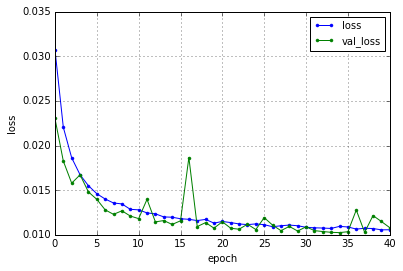

hiden node = 16
-edim=16-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0303 - val_loss: 0.0319
Epoch 2/50
5s - loss: 0.0243 - val_loss: 0.0243
Epoch 3/50
5s - loss: 0.0236 - val_loss: 0.0290
Epoch 4/50
5s - loss: 0.0235 - val_loss: 0.0224
Epoch 5/50
5s - loss: 0.0232 - val_loss: 0.0188
Epoch 6/50
5s - loss: 0.0233 - val_loss: 0.0209
Epoch 7/50
5s - loss: 0.0233 - val_loss: 0.0226
Epoch 8/50
5s - loss: 0.0230 - val_loss: 0.0225
Epoch 9/50
5s - loss: 0.0230 - val_loss: 0.0219
Epoch 10/50
5s - loss: 0.0231 - val_loss: 0.0300
Epoch 11/50
5s - loss: 0.0230 - val_loss: 0.0263


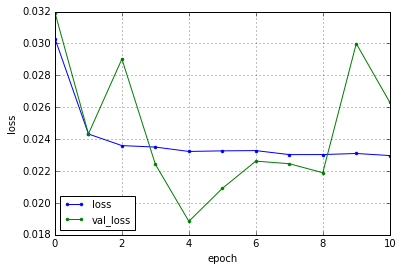

hiden node = 16
-edim=16-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0349 - val_loss: 0.0307
Epoch 2/50
5s - loss: 0.0302 - val_loss: 0.0292
Epoch 3/50
5s - loss: 0.0301 - val_loss: 0.0308
Epoch 4/50
5s - loss: 0.0299 - val_loss: 0.0298
Epoch 5/50
5s - loss: 0.0294 - val_loss: 0.0309
Epoch 6/50
5s - loss: 0.0298 - val_loss: 0.0298
Epoch 7/50
5s - loss: 0.0293 - val_loss: 0.0286
Epoch 8/50
5s - loss: 0.0291 - val_loss: 0.0318
Epoch 9/50
5s - loss: 0.0290 - val_loss: 0.0297
Epoch 10/50
5s - loss: 0.0286 - val_loss: 0.0284
Epoch 11/50
5s - loss: 0.0292 - val_loss: 0.0267
Epoch 12/50
5s - loss: 0.0285 - val_loss: 0.0336
Epoch 13/50
5s - loss: 0.0285 - val_loss: 0.0285
Epoch 14/50
5s - loss: 0.0280 - val_loss: 0.0288
Epoch 15/50
5s - loss: 0.0278 - val_loss: 0.0281
Epoch 16/50
5s - loss: 0.0280 - val_loss: 0.0371
Epoch 17/50
5s - loss: 0.0281 - val_loss: 0.0375


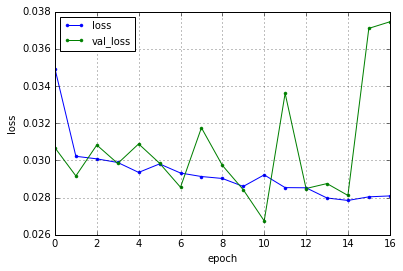

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
